In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [32]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
#SibSp column heading mean any siblings or spouse aboard for the following passenger
#Parch means parents/children aboard for the following passenger
#embarked means the port from which the following passenger boarded from S-Southampton, C-Cherboug, Q- Queensland
#Pclass coloumn signifies the three classes in which the passengers of the titanic were divided into, 1- Upper class, 2-Middle class, 3-Lower class. It determines the socio-economic disparoty present among the passengers.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#**Preprocessing and cleaning the train and test data**

In [34]:
#we will drop the passenger id column from the test and training data as it is of no use for model prediction

train_data.drop('PassengerId', axis= 1, inplace = True)
test_data.drop('PassengerId', axis = 1, inplace = True)

In [35]:
train_data.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)
test_data.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [36]:
#now we will label encode the sex and embarked column
#label encoding means we will display sex with 0 or 1 (male, female) and similarly for embarked
#label encoding is possible in two ways, one by using sklearn method and the other is by using Python functions
from sklearn.preprocessing import LabelEncoder
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex']) #1 is male and 0 is female
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex']) 

In [37]:
train_data['Embarked'] = train_data['Embarked'].replace({"S":1 , "Q": 2, "C": 3});
test_data['Embarked'] = test_data['Embarked'].replace({"S":1 , "Q": 2, "C": 3});

/tmp/ipykernel_33/3361895599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Embarked'] = train_data['Embarked'].replace({"S":1 , "Q": 2, "C": 3});
/tmp/ipykernel_33/3361895599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Embarked'] = test_data['Embarked'].replace({"S":1 , "Q": 2, "C": 3});


In [38]:
train_data["Sex"].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [39]:
train_data['Embarked'].value_counts()

Embarked
1.0    644
3.0    168
2.0     77
Name: count, dtype: int64

In [40]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,3.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [41]:
test_data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


**Now we will clean and fill in the NaN Values**

In [42]:
print(train_data.isnull().sum())
#we have null values for Age and Cabin and embarked
#the passengers who payed less price for the ticket did not have a cabin(NaN)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [43]:
#now we need to assign some value to the NaN values for the age column
#so for age we will fill in the missing values with the median age
median_age = train_data['Age'].median()
train_data.fillna({'Age': median_age}, inplace=True)

In [44]:
#now we will assign some value to the NaN values in the embarked column.
#we will assign the value which is more visited or has more frequency.
most_frequent_embarked = train_data['Embarked'].mode()[0]   #mode is used to calculate the frequency
train_data.fillna({'Embarked': most_frequent_embarked}, inplace= True)

In [45]:
print(test_data.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [46]:
median_age = test_data['Age'].median()
test_data.fillna({'Age': median_age}, inplace=True)

In [47]:
mean_fare = test_data['Fare'].mean()
test_data.fillna({'Fare': mean_fare}, inplace=True)

In [48]:
print(test_data.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Plotting**

<Axes: xlabel='Embarked', ylabel='Survived'>

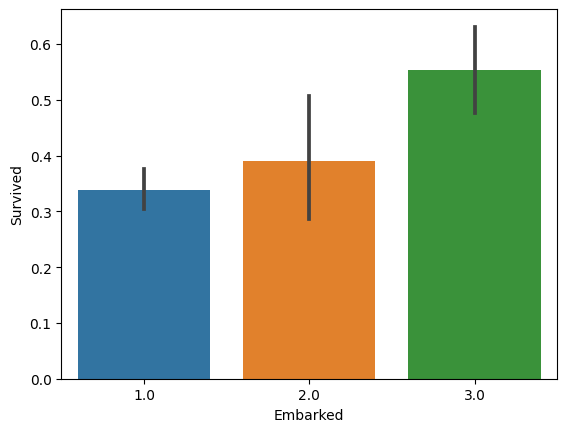

In [49]:
sns.barplot(x= train_data.Embarked, y= train_data.Survived)

<Axes: xlabel='Sex', ylabel='Survived'>

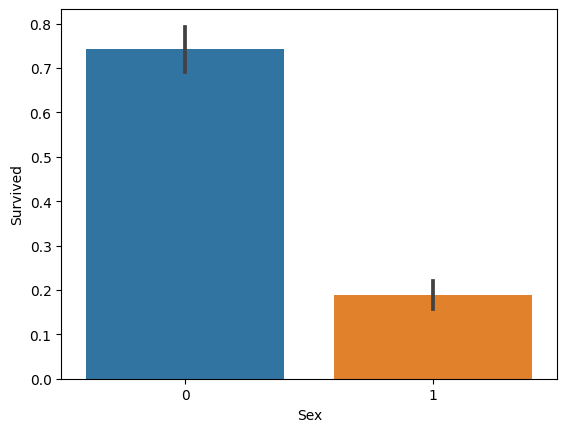

In [50]:
sns.barplot(x= train_data.Sex, y= train_data.Survived)

<Axes: xlabel='Pclass', ylabel='Survived'>

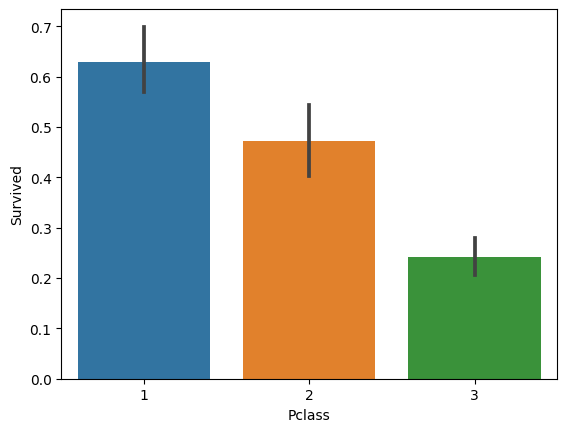

In [51]:
sns.barplot(x= train_data.Pclass, y= train_data.Survived)
#1-upper class, 2- Middle class, 3- Lower class

In [52]:
train_data[(train_data["Sex"] == 0) & (train_data["Survived"] == 1)].Survived.count()

233

In [53]:
train_data[(train_data["Pclass"] == 1) & (train_data["Survived"] == 1)].Survived.count()

136

# TRAIN AND TESTING OF THE MODEL

In [54]:
#First we create x_train and y_train 

x_train = train_data.drop(['Survived'], axis = 1)
y_train = train_data['Survived']

In [55]:
#creating our model

model = LogisticRegression()

In [56]:
#fitting our model which simply means training our model

model.fit(x_train, y_train)

LogisticRegression()

In [58]:
#predicting our model

y_pred = model.predict(test_data)

In [59]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Checking Model Accuracy

In [60]:
from sklearn.metrics import accuracy_score

In [63]:
score = accuracy_score(submission_data['Survived'], y_pred)

In [64]:
print(score)

0.9401913875598086


# Now test and train with different features

In [66]:
x_train = train_data.drop(['Age', 'Survived'], axis=1)
y_train = train_data['Survived']

In [67]:
model = LogisticRegression()

In [68]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = model.predict(test_data.drop('Age', axis=1))

In [70]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [71]:
score = accuracy_score(submission_data['Survived'], y_pred)

In [72]:
print(score)

0.9497607655502392


# 2

In [75]:
x_train = train_data.drop(['Pclass' , 'Survived'], axis=1)
y_train = train_data['Survived']

In [76]:
model = LogisticRegression()

In [77]:
model.fit(x_train, y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(test_data.drop('Pclass', axis=1))

In [79]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [80]:
score = accuracy_score(submission_data['Survived'], y_pred)

In [81]:
print(score)

0.9665071770334929


therefore, we get the best accuracy with the Pclass

# Output file

In [82]:
output= pd.DataFrame({'PassengerId': submission_data['PassengerId'], 'Survived': y_pred})

In [83]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
